# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 271169413
sectors = np.array([11,38])

period = 3.9649789990
tdepth = 1.325617*0.001

lc_file = "TOI_4559_S11_38.csv"
contrastcurve_file = "TOI_4559_562nm.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12076\2956061273.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap11, ap38])


Sector 11


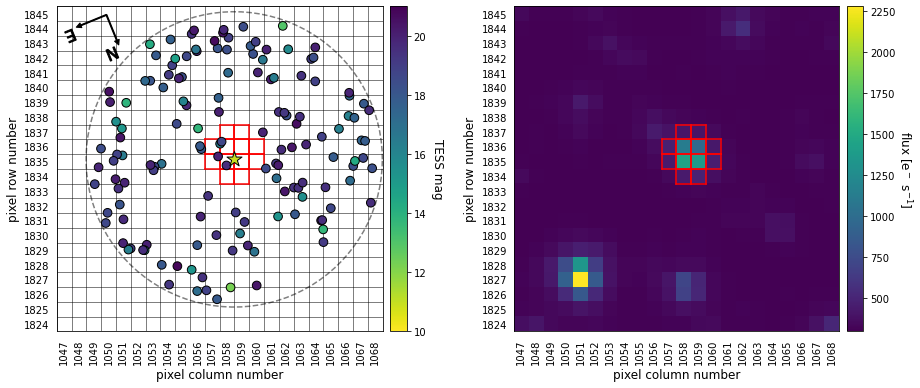

Sector 38


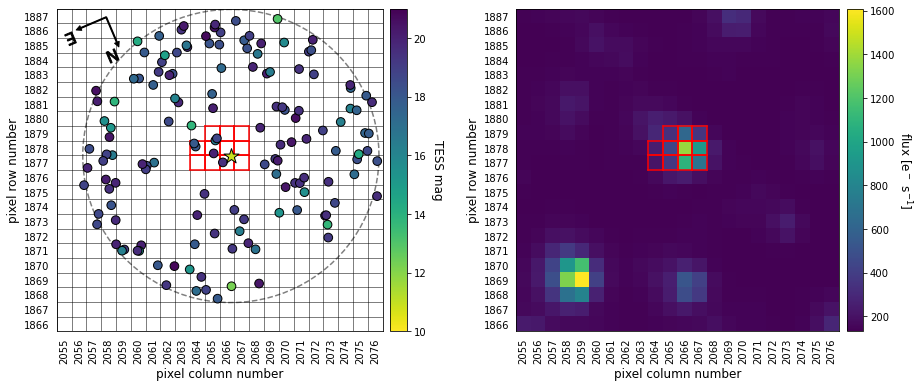

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,271169413,10.9139,9.455,8.831,8.619,211.013353,-30.013065,0.421338,0.426767,3476.0,31.581500,0.000,0.000
1,1055588740,19.5028,NaN,NaN,NaN,211.017642,-30.012005,NaN,NaN,NaN,NaN,13.903,74.067
2,1055588739,19.9735,NaN,NaN,NaN,211.019514,-30.016535,NaN,NaN,NaN,NaN,22.911,123.042
3,271169416,16.4683,15.390,14.672,14.617,211.016435,-30.020858,0.650000,0.651745,4155.0,1.144500,29.653,161.097
4,1055588738,18.6249,NaN,NaN,NaN,211.015459,-30.021371,0.520000,1.004460,3620.0,-0.224823,30.614,167.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1055588802,19.6189,NaN,NaN,NaN,210.964298,-29.976991,NaN,NaN,NaN,NaN,200.645,310.322
140,271169445,14.2906,13.670,13.327,13.288,211.028031,-30.067485,1.090000,1.031620,5944.0,0.910630,201.178,166.861
141,1055588752,18.5968,NaN,NaN,NaN,211.077907,-30.008979,0.700000,0.568756,4487.0,0.124206,201.774,85.835
142,1055588790,19.6530,NaN,NaN,NaN,210.948660,-30.010878,NaN,NaN,NaN,NaN,201.823,272.220


In [4]:
ap11 = np.array([[1058,1834],[1059,1834],[1057,1835],[1058,1835],[1059,1835],
                 [1060,1835],[1057,1836],[1058,1836],[1059,1836],[1060,1836],
                 [1058,1837],[1059,1837]])

ap38 = np.array([[2064,1877],[2065,1877],[2066,1877],[2067,1877],[2064,1878],
                 [2065,1878],[2066,1878],[2067,1878],[2065,1879],[2066,1879],
                 [2067,1879]])

apertures = np.array([ap11, ap38])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,271169413,10.9139,9.455,8.831,8.619,211.013353,-30.013065,0.421338,0.426767,3476.0,31.581500,0.000,0.000,9.861366e-01,0.001344
1,1055588740,19.5028,NaN,NaN,NaN,211.017642,-30.012005,NaN,NaN,NaN,NaN,13.903,74.067,3.194292e-04,0.000000
2,1055588739,19.9735,NaN,NaN,NaN,211.019514,-30.016535,NaN,NaN,NaN,NaN,22.911,123.042,2.214875e-04,0.000000
3,271169416,16.4683,15.390,14.672,14.617,211.016435,-30.020858,0.650000,0.651745,4155.0,1.144500,29.653,161.097,5.222989e-03,0.253804
4,1055588738,18.6249,NaN,NaN,NaN,211.015459,-30.021371,0.520000,1.004460,3620.0,-0.224823,30.614,167.616,7.018984e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1055588802,19.6189,NaN,NaN,NaN,210.964298,-29.976991,NaN,NaN,NaN,NaN,200.645,310.322,7.527055e-29,0.000000
140,271169445,14.2906,13.670,13.327,13.288,211.028031,-30.067485,1.090000,1.031620,5944.0,0.910630,201.178,166.861,9.887353e-25,0.000000
141,1055588752,18.5968,NaN,NaN,NaN,211.077907,-30.008979,0.700000,0.568756,4487.0,0.124206,201.774,85.835,5.844043e-27,0.000000
142,1055588790,19.6530,NaN,NaN,NaN,210.948660,-30.010878,NaN,NaN,NaN,NaN,201.823,272.220,1.235021e-27,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

3 271169416
13 271169419


In [7]:
target.stars['tdepth'][3] = 0
target.stars['tdepth'][13] = 0

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12076\1227076906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][3] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12076\1227076906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][13] = 0


# Ploting CC File

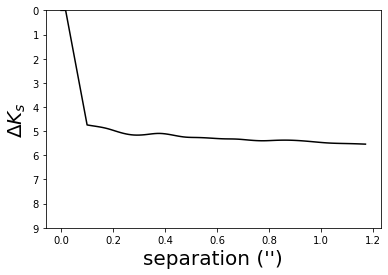

In [8]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

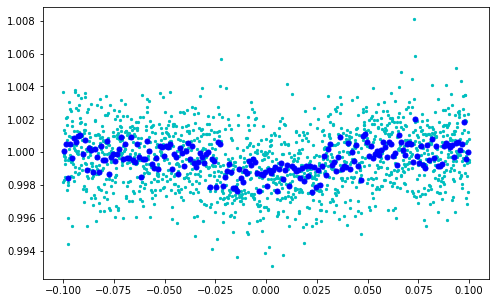

In [9]:
lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [10]:
%%time
FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)
                      
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 271169413.
Calculating EB and EBx2P scenario probabilities for 271169413.
Calculating PTP scenario probability for 271169413.
Calculating PEB and PEBx2P scenario probabilities for 271169413.
Calculating STP scenario probability for 271169413.
Calculating SEB and SEBx2P scenario probabilities for 271169413.
Calculating DTP scenario probability for 271169413.
Calculating DEB and DEBx2P scenario probabilities for 271169413.
Calculating BTP scenario probability for 271169413.
Calculating BEB and BEBx2P scenario probabilities for 271169413.
FPP =  0.012282773042922024
NFPP =  0.0
Calculating TP scenario probabilitiey for 271169413.
Calculating EB and EBx2P scenario probabilities for 271169413.
Calculating PTP scenario probability for 271169413.
Calculating PEB and PEBx2P scenario probabilities for 271169413.
Calculating STP scenario probability for 271169413.
Calculating SEB and SEBx2P scenario probabilities for 271169413.
Calculating DTP scenario p

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.008970277255515358
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,271169413,TP,0.421338,0.426767,3.964979,88.146975,0.705962,0.271939,232.067186,1.666236,0.000000,0.000000,8.670463e-01
1,271169413,EB,0.421338,0.426767,3.964979,84.629584,1.690690,0.228263,45.782160,0.000000,0.302006,0.319569,4.330798e-34
2,271169413,EBx2P,0.421338,0.426767,7.929958,87.756913,0.873053,0.773910,205.668930,0.000000,0.416902,0.417179,3.236285e-10
3,271169413,PTP,0.421338,0.426767,3.964979,88.103339,0.409478,0.711237,201.472389,2.578957,0.000000,0.000000,0.000000e+00
4,271169413,PEB,0.421338,0.426767,3.964979,84.968040,1.909627,0.097368,30.376867,0.000000,0.392405,0.395672,1.121123e-34
5,271169413,PEBx2P,0.421338,0.426767,7.929958,87.991331,1.024401,0.613036,200.212115,0.000000,0.412342,0.413091,9.046014e-14
6,271169413,STP,0.130534,0.159789,3.964979,89.647450,0.131708,0.537178,167.926069,2.513681,0.000000,0.000000,0.000000e+00
7,271169413,SEB,0.105374,0.127589,3.964979,88.036140,1.386571,0.041962,102.728008,0.000000,0.027772,0.100000,1.888690e-30
8,271169413,SEBx2P,0.104003,0.125680,7.929958,89.042202,0.176482,0.910700,162.534295,0.000000,0.103173,0.124515,4.787841e-05
9,271169413,DTP,0.421338,0.426767,3.964979,88.221050,0.741754,0.352038,245.761203,1.649544,0.000000,0.000000,1.239834e-01


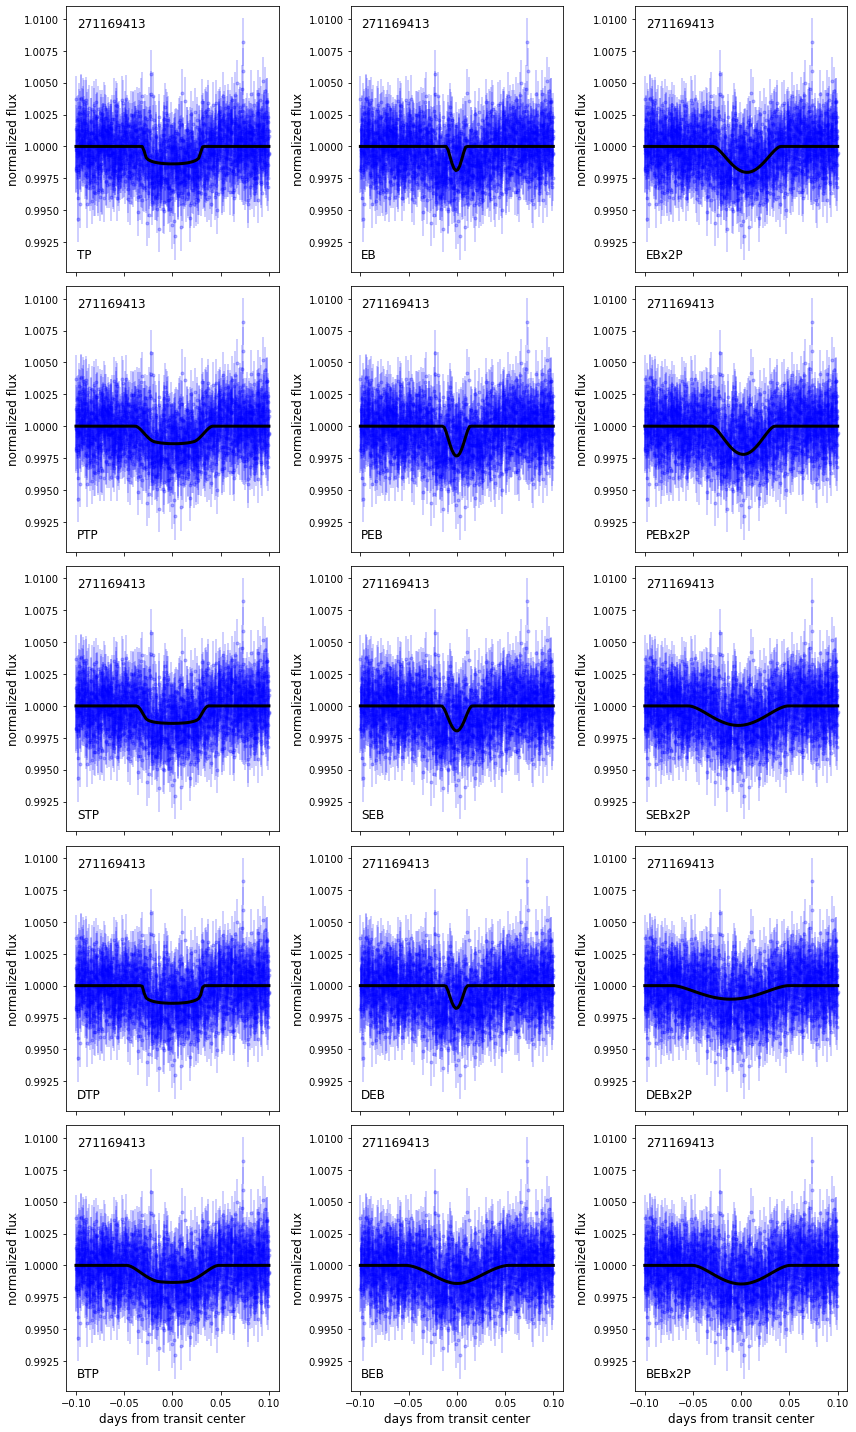

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [13]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.012282773042922024 ,
0.00731506610549193 ,
0.011122560880220123 ,
0.01053363270528096 ,
0.00933606029383749 ,
0.007592407988528338 ,
0.01112870027564461 ,
0.012173968587813944 ,
0.009045136580870139 ,
0.007584969163232258 ,
0.010322744285022778 ,
0.011446150119870713 ,
0.008159037193093632 ,
0.010049790006334325 ,
0.005398415677239976 ,
0.011329940216833645 ,
0.007791479288157932 ,
0.011034860657903822 ,
0.00961311434653389 ,
0.008970277255515358 ,
NFPPs:
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,


### TESS Filter No neighbour

In [14]:
ID = 271169413
sectors = np.array([11,38])

period = 3.9649789990
tdepth = 1.325617*0.001

lc_file = "TOI_4559_S11_38.csv"
contrastcurve_file = "TOI_4559_832nm.csv"

band = 'TESS'

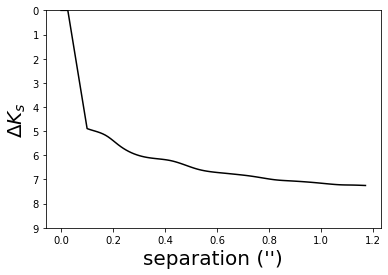

In [15]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

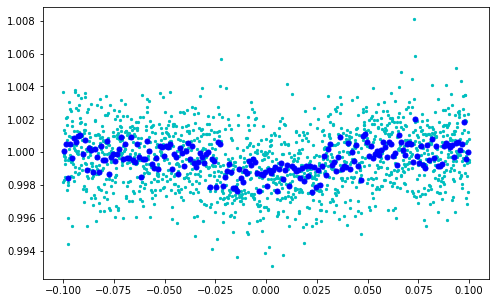

In [16]:
lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [17]:
%%time
FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)
                      
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 271169413.
Calculating EB and EBx2P scenario probabilities for 271169413.
Calculating PTP scenario probability for 271169413.
Calculating PEB and PEBx2P scenario probabilities for 271169413.
Calculating STP scenario probability for 271169413.
Calculating SEB and SEBx2P scenario probabilities for 271169413.
Calculating DTP scenario probability for 271169413.
Calculating DEB and DEBx2P scenario probabilities for 271169413.
Calculating BTP scenario probability for 271169413.
Calculating BEB and BEBx2P scenario probabilities for 271169413.
FPP =  0.003500053038799078
NFPP =  0.0
Calculating TP scenario probabilitiey for 271169413.
Calculating EB and EBx2P scenario probabilities for 271169413.
Calculating PTP scenario probability for 271169413.
Calculating PEB and PEBx2P scenario probabilities for 271169413.
Calculating STP scenario probability for 271169413.
Calculating SEB and SEBx2P scenario probabilities for 271169413.
Calculating DTP scenario p

In [18]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.003500053038799078 ,
0.0031909428731987655 ,
0.0033319586593751893 ,
0.0026032338305053138 ,
0.004042060667915681 ,
0.002443913769544226 ,
0.00364228578335668 ,
0.003109043327358174 ,
0.003276039568546829 ,
0.0040595934290440505 ,
0.0031848544926943445 ,
0.004581509675430029 ,
0.0031715175696678255 ,
0.004333447615632813 ,
0.004259522399074012 ,
0.0032790255376161648 ,
0.003398247831380874 ,
0.004234416857866741 ,
0.003824450016141623 ,
0.003683383518003236 ,
NFPPs:
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,


In [19]:
##Vis

fpp=np.array([0.012282773042922024 ,
0.00731506610549193 ,
0.011122560880220123 ,
0.01053363270528096 ,
0.00933606029383749 ,
0.007592407988528338 ,
0.01112870027564461 ,
0.012173968587813944 ,
0.009045136580870139 ,
0.007584969163232258 ,
0.010322744285022778 ,
0.011446150119870713 ,
0.008159037193093632 ,
0.010049790006334325 ,
0.005398415677239976 ,
0.011329940216833645 ,
0.007791479288157932 ,
0.011034860657903822 ,
0.00961311434653389 ,
0.008970277255515358])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.009611554233517394 +/- 0.0018113192777393975
0.0 +/- 0.0


In [21]:
##TESS filter

fpp=np.array([0.003500053038799078 ,
0.0031909428731987655 ,
0.0033319586593751893 ,
0.0026032338305053138 ,
0.004042060667915681 ,
0.002443913769544226 ,
0.00364228578335668 ,
0.003109043327358174 ,
0.003276039568546829 ,
0.0040595934290440505 ,
0.0031848544926943445 ,
0.004581509675430029 ,
0.0031715175696678255 ,
0.004333447615632813 ,
0.004259522399074012 ,
0.0032790255376161648 ,
0.003398247831380874 ,
0.004234416857866741 ,
0.003824450016141623 ,
0.003683383518003236])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

0.0035574750230575824 +/- 0.0005564736284221505
0.0 +/- 0.0
